In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from intrinsic_alignments.project_settings import PROJECT_DIRECTORY
import os
%matplotlib inline

# Illustris Alignments

In [2]:
from Illustris_Shapes.simulation_props import sim_prop_dict

simname = 'TNG300-1'
snapnum = 99
shape_type = 'iterative'

d = sim_prop_dict[simname]
Lbox = d['Lbox']

## open catalogs

In [3]:
from astropy.table import Table
#fpath = PROJECT_DIRECTORY + 'data/Illustris/'
fpath = os.path.join(PROJECT_DIRECTORY[:-1], 'data', 'Illustris')

# load VAGC
#fname = 'value_added_catalogs/' + simname + '_' + str(snapnum) + '_vagc.dat'
fname = os.path.join('value_added_catalogs',simname + '_' + str(snapnum) + '_vagc.dat')
#vagc_galaxy_table = Table.read(fpath + fname, format='ascii')
vagc_galaxy_table = Table.read( os.path.join(fpath, fname), format='ascii')

# load galaxy shape catalog
#fname = 'shape_catalogs/' + simname + '_' + str(snapnum) + '_' + shape_type + '_galaxy_shapes.dat'
fname = os.path.join('shape_catalogs', simname + '_' + str(snapnum) + '_' + shape_type + '_galaxy_shapes.dat')
#galaxy_shape_table = Table.read(fpath + fname, format='ascii')
galaxy_shape_table = Table.read( os.path.join(fpath, fname), format='ascii')

# load halo shape catalog
#fname = 'shape_catalogs/' + simname + '_' + str(snapnum) + '_' + shape_type + '_halo_shapes.dat'
fname = os.path.join('shape_catalogs', simname + '_' + str(snapnum) + '_' + shape_type + '_halo_shapes.dat')
halo_shape_table = Table.read( os.path.join(fpath, fname), format='ascii')

# join galaxy shape and vagc tables
from astropy.table import join
galaxy_table = join(vagc_galaxy_table, galaxy_shape_table)
for key in galaxy_table.keys():
    print(key)

MemoryError: 

In [12]:
PROJECT_DIRECTORY[:-1]

'c:\\users\\nvana\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\intrinsic_alignments'

In [ ]:
# add halo properties
from halotools.utils import crossmatch
idx, idy = crossmatch(galaxy_table['gal_id'],halo_shape_table['halo_id'])

galaxy_table['halo_a'] = -1.0
galaxy_table['halo_b'] = -1.0
galaxy_table['halo_c'] = -1.0

galaxy_table['halo_a'][idx] = halo_shape_table['a'][idy]
galaxy_table['halo_b'][idx] = halo_shape_table['b'][idy]
galaxy_table['halo_c'][idx] = halo_shape_table['c'][idy]

galaxy_table['halo_av_x'] = -1.0
galaxy_table['halo_av_y'] = -1.0
galaxy_table['halo_av_z'] = -1.0

galaxy_table['halo_bv_x'] = -1.0
galaxy_table['halo_bv_y'] = -1.0
galaxy_table['halo_bv_z'] = -1.0

galaxy_table['halo_cv_x'] = -1.0
galaxy_table['halo_cv_y'] = -1.0
galaxy_table['halo_cv_z'] = -1.0

galaxy_table['halo_av_x'][idx] = halo_shape_table['av_x'][idy]
galaxy_table['halo_av_y'][idx] = halo_shape_table['av_y'][idy]
galaxy_table['halo_av_z'][idx] = halo_shape_table['av_z'][idy]

galaxy_table['halo_bv_x'][idx] = halo_shape_table['bv_x'][idy]
galaxy_table['halo_bv_y'][idx] = halo_shape_table['bv_y'][idy]
galaxy_table['halo_bv_z'][idx] = halo_shape_table['bv_z'][idy]

galaxy_table['halo_cv_x'][idx] = halo_shape_table['cv_x'][idy]
galaxy_table['halo_cv_y'][idx] = halo_shape_table['cv_y'][idy]
galaxy_table['halo_cv_z'][idx] = halo_shape_table['cv_z'][idy]

In [35]:
# load DMO halo shapes

# load halo shape catalog
##fname = 'shape_catalogs/' + simname+'-Dark' + '_' + str(snapnum) + '_' + shape_type + '_halo_shapes.dat'
fname = os.path.join('shape_catalogs', simname+'-Dark' + '_' + str(snapnum) + '_' + shape_type + '_halo_shapes.dat')
##dmo_halo_shape_table = Table.read(fpath + fname, format='ascii')
dmo_halo_shape_table = Table.read( os.path.join(fpath, fname), format='ascii' )

# load halo matching table
#fname = 'value_added_catalogs/' + simname+ + '_' + str(snapnum) + '_halo_matchin.dat'
fname = os.path.join('value_added_catalogs', simname + '_' + str(snapnum) + '_halo_matching.dat')
dmo_halo_shape_table = Table.read( os.path.join(fpath, fname), format='ascii' )

# match into dmo only catalog
idx, idy = crossmatch(galaxy_table['host_halo_id'],dmo_halo_shape_table['host_halo_id'])
dmo_host_id = np.zeros(len(galaxy_table))-1
dmo_host_id[idx] = dmo_halo_shape_table['dmo_host_halo_id'][idy]

crossmatch(dmo_host_id,)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\users\\nvana\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\intrinsic_alignments\\data\\Illustris\\value_added_catalogs\\TNG300-1_99_halo_matchin.dat'

In [32]:
p = os.listdir( os.path.join(fpath,"shape_catalogs") )
# Errors above seem to be:
# there are TNG100-1-Dark...
# but not TNG300-1-Dark
# 100, but no 300
simname

'TNG300-1'

In [33]:
galaxy_table['dmo_halo_a'] = -1.0
galaxy_table['dmo_halo_b'] = -1.0
galaxy_table['dmo_halo_c'] = -1.0

galaxy_table['dmo_halo_a'][idx] = dmo_halo_shape_table['a'][idy]
galaxy_table['dmo_halo_b'][idx] = dmo_halo_shape_table['b'][idy]
galaxy_table['dmo_halo_c'][idx] = dmo_halo_shape_table['c'][idy]

galaxy_table['dmo_halo_av_x'] = -1.0
galaxy_table['dmo_halo_av_y'] = -1.0
galaxy_table['dmo_halo_av_z'] = -1.0

galaxy_table['dmo_halo_bv_x'] = -1.0
galaxy_table['dmo_halo_bv_y'] = -1.0
galaxy_table['dmo_halo_bv_z'] = -1.0

galaxy_table['dmo_halo_cv_x'] = -1.0
galaxy_table['dmo_halo_cv_y'] = -1.0
galaxy_table['dmo_halo_cv_z'] = -1.0

galaxy_table['dmo_halo_av_x'][idx] = halo_shape_table['av_x'][idy]
galaxy_table['dmo_halo_av_y'][idx] = halo_shape_table['av_y'][idy]
galaxy_table['dmo_halo_av_z'][idx] = halo_shape_table['av_z'][idy]

galaxy_table['dmo_halo_bv_x'][idx] = halo_shape_table['bv_x'][idy]
galaxy_table['dmo_halo_bv_y'][idx] = halo_shape_table['bv_y'][idy]
galaxy_table['dmo_halo_bv_z'][idx] = halo_shape_table['bv_z'][idy]

galaxy_table['dmo_halo_cv_x'][idx] = halo_shape_table['cv_x'][idy]
galaxy_table['dmo_halo_cv_y'][idx] = halo_shape_table['cv_y'][idy]
galaxy_table['dmo_halo_cv_z'][idx] = halo_shape_table['cv_z'][idy]

NameError: name 'dmo_halo_shape_table' is not defined

## Shape Correlations

In [10]:
coords = np.vstack((galaxy_table['x'],
                    galaxy_table['y'],
                    galaxy_table['z'])).T/1000.0

# galaxy major_axis
gal_orientations_major = np.vstack((galaxy_table['av_x'],
                                galaxy_table['av_y'],
                                galaxy_table['av_z'])).T

# galaxy major_axis
gal_orientations_minor = np.vstack((galaxy_table['cv_x'],
                                galaxy_table['cv_y'],
                                galaxy_table['cv_z'])).T

# halo major_axis
halo_orientations_major = np.vstack((galaxy_table['halo_av_x'],
                                galaxy_table['halo_av_y'],
                                galaxy_table['halo_av_z'])).T

# halo major_axis
halo_orientations_minor = np.vstack((galaxy_table['halo_cv_x'],
                                galaxy_table['halo_cv_y'],
                                galaxy_table['halo_cv_z'])).T

In [11]:
rbins = np.logspace(-1,1.5,15)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

mask = galaxy_table['stellar_mass_all']>10**10.5
print('number of galaxies in selection: ', np.sum(mask))

number of galaxies in selection:  24433


In [12]:
from intrinsic_alignments.utils.jackknife_observables import jackknife_ed_3d, jackknife_ee_3d

result_1, cov_1 = jackknife_ee_3d(coords[mask], gal_orientations_major[mask],
                                  coords[mask], gal_orientations_major[mask],
                                  rbins, period=Lbox,
                                  Nsub=[3, 3, 3], verbose=True)
result_1_err = np.sqrt(np.diag(cov_1))

result_2, cov_2 = jackknife_ed_3d(coords[mask], gal_orientations_major[mask],
                                  coords[mask],
                                  rbins, period=Lbox,
                                  Nsub=[3, 3, 3], verbose=True)
result_2_err = np.sqrt(np.diag(cov_2))

estimated time to complete jackknife calculation (s): 19.575699091
estimated time to complete jackknife calculation (s): 22.7685041428


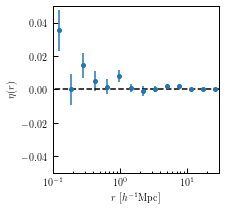

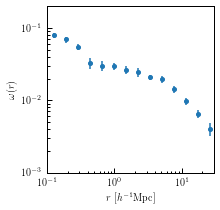

In [13]:
fig, ax = plt.subplots(1,1, sharex=False, sharey=False, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(rbin_centers, result_1, result_1_err, fmt='o', ms=4)
ax.plot([0.001,100],[0,0], '--', color='black')
ax.set_xscale('log')
ax.set_ylim([-0.05,0.05])
ax.set_xlim([0.1,30])
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.show()

savepath = '/Users/duncan/Desktop/'
fname = simname+'_ee_example.pdf'
fig.savefig(savepath + fname, dpi=250)

fig, ax = plt.subplots(1,1, sharex=False, sharey=False, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(rbin_centers, result_2, result_2_err, fmt='o', ms=4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001,0.2])
ax.set_xlim([0.1,30])
ax.set_ylabel(r'$\omega(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
plt.show()

fname = simname+'_ed_example.pdf'
fig.savefig(savepath + fname, dpi=250)

# Misalignments

In [77]:
from rotations.vector_utilities import angles_between_list_of_vectors

centrals = (galaxy_table['gal_id']==galaxy_table['central_id'])

da = angles_between_list_of_vectors(gal_orientations_minor, halo_orientations_major)
da = da[mask & centrals]

ValueError: operands could not be broadcast together with shapes (110787,) (260069,) 

k= -2.469335937500003


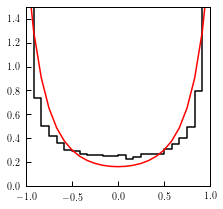

In [15]:
# misalignment angle distribution
bins = np.linspace(-1,1,25)
cos_da = np.cos(da)
ran_u = np.random.random(len(cos_da))
mask = ran_u>0.5
cos_da[mask] = cos_da[mask]*-1.0
counts = np.histogram(cos_da, bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)

# fit watson distribution
from watson_distribution import DimrothWatson
dist = DimrothWatson()
k = dist.fit(np.fabs(cos_da),floc=0, fscale=1)[0]
print('k=',k)

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1], counts, color='black', where='post')
plt.plot(bins,dist.pdf(bins, k=k), color='red')
plt.xlim([-1,1])
plt.ylim([0,1.5])
plt.show()

In [16]:
from intrinsic_alignments.ia_models.ia_model_components import inverse_alignment_strength, alignment_strength
inverse_alignment_strength(k)

array([0.75504076])

In [17]:
from intrinsic_alignments.utils.vector_utilities import pbc_radial_vector

In [18]:
from halotools.utils import crossmatch
idx, idy = crossmatch(galaxy_table['central_id'], galaxy_table['gal_id'])

In [61]:
centrals = galaxy_table['central_id'][idy] == galaxy_table['central_id'][idy]
satellites = galaxy_table['central_id'] != galaxy_table['central_id']

r = pbc_radial_vector(coords[idx], coords[idy], Lbox=Lbox)
galaxy_table['r_x'] = np.zeros(len(galaxy_table)).astype('float')
galaxy_table['r_y'] = np.zeros(len(galaxy_table)).astype('float')
galaxy_table['r_z'] = np.zeros(len(galaxy_table)).astype('float')
galaxy_table['r_x'][idx] = r[:,0]
galaxy_table['r_y'][idx] = r[:,1]
galaxy_table['r_z'][idx] = r[:,2]
galaxy_table['mag_r'] = float(0.0)
galaxy_table['mag_r'] = np.sum(galaxy_table['r_x']**2 + galaxy_table['r_y']**2 +galaxy_table['r_z']**2)

In [74]:
satellites = (galaxy_table['mag_r']>0.0)

r = np.vstack((galaxy_table['r_x'], galaxy_table['r_y'], galaxy_table['r_z'])).T
da = angles_between_list_of_vectors(gal_orientations_major, r)
da = da[satellites]
da = da[~np.isnan(da)]

In [75]:
da

array([2.79271068, 2.38472289, 1.5989017 , ..., 1.92170612, 1.90577973,
       1.95807069])

k= -0.08300781250000096


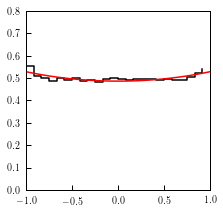

In [76]:
# misalignment angle distribution
bins = np.linspace(-1,1,25)
cos_da = np.cos(da)
ran_u = np.random.random(len(cos_da))
mask = ran_u>0.5
cos_da[mask] = cos_da[mask]*-1.0
counts = np.histogram(cos_da, bins=bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(bins)

# fit watson distribution
from watson_distribution import DimrothWatson
dist = DimrothWatson()
k = dist.fit(np.fabs(cos_da),floc=0, fscale=1)[0]
print('k=',k)

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1], counts, color='black', where='post')
plt.plot(bins,dist.pdf(bins, k=k), color='red')
plt.xlim([-1,1])
plt.ylim([0,0.8])
plt.show()

In [72]:
inverse_alignment_strength(k)

array([-0.10950726])